In [ ]:
import pandas as pd

# Load data
file_path = "CENSUS_INCOME.csv"
data = pd.read_csv(file_path)

# Display first few rows
data.head()


,AGE,WORKCLASS,FNLWGT,EDUCATION,EDUCATION-NUM,MARITAL-STATUS,OCCUPATION,RELATIONSHIP,RACE,SEX,CAPITAL-GAIN,CAPITAL-LOSS,HOURS-PER-WEEK,NATIVE COUNTRY,INCOME
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Encode categorical columns
label_encoders = {}
for col in data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# Display first few rows after encoding
data.head()


,AGE,WORKCLASS,FNLWGT,EDUCATION,EDUCATION-NUM,MARITAL-STATUS,OCCUPATION,RELATIONSHIP,RACE,SEX,CAPITAL-GAIN,CAPITAL-LOSS,HOURS-PER-WEEK,NATIVE COUNTRY,INCOME
0,39,7,77516,9,13,4,1,1,4,1,2174,0,40,39,0
1,50,6,83311,9,13,2,4,0,4,1,0,0,13,39,0
2,38,4,215646,11,9,0,6,1,4,1,0,0,40,39,0
3,53,4,234721,1,7,2,6,0,2,1,0,0,40,39,0
4,28,4,338409,9,13,2,10,5,2,0,0,0,40,5,0


In [ ]:
# Check for missing values
missing_values = data.isnull().sum()

# Print missing values count per column
print("Missing Values in Each Column:")
print(missing_values)


Missing Values in Each Column:
AGE               0
WORKCLASS         0
FNLWGT            0
EDUCATION         0
EDUCATION-NUM     0
MARITAL-STATUS    0
OCCUPATION        0
RELATIONSHIP      0
RACE              0
SEX               0
CAPITAL-GAIN      0
CAPITAL-LOSS      0
HOURS-PER-WEEK    0
NATIVE COUNTRY    0
INCOME            0
dtype: int64


In [ ]:
from sklearn.preprocessing import StandardScaler

# Define numerical columns to scale
numeric_cols = ['AGE', 'FNLWGT', 'EDUCATION-NUM', 'CAPITAL-GAIN', 'CAPITAL-LOSS', 'HOURS-PER-WEEK']
scaler = StandardScaler()

# Apply standardization
data[numeric_cols] = scaler.fit_transform(data[numeric_cols])

# Display first few rows after scaling
data.head()


,AGE,WORKCLASS,FNLWGT,EDUCATION,EDUCATION-NUM,MARITAL-STATUS,OCCUPATION,RELATIONSHIP,RACE,SEX,CAPITAL-GAIN,CAPITAL-LOSS,HOURS-PER-WEEK,NATIVE COUNTRY,INCOME
0,0.030671,7,-1.063611,9,1.134739,4,1,1,4,1,0.148453,-0.21666,-0.035429,39,0
1,0.837109,6,-1.008707,9,1.134739,2,4,0,4,1,-0.145920,-0.21666,-2.222153,39,0
2,-0.042642,4,0.245079,11,-0.420060,0,6,1,4,1,-0.145920,-0.21666,-0.035429,39,0
3,1.057047,4,0.425801,1,-1.197459,2,6,0,2,1,-0.145920,-0.21666,-0.035429,39,0
4,-0.775768,4,1.408176,9,1.134739,2,10,5,2,0,-0.145920,-0.21666,-0.035429,5,0


In [ ]:
# Display summary statistics
summary_stats = data.describe()

summary_stats

,AGE,WORKCLASS,FNLWGT,EDUCATION,EDUCATION-NUM,MARITAL-STATUS,OCCUPATION,RELATIONSHIP,RACE,SEX,CAPITAL-GAIN,CAPITAL-LOSS,HOURS-PER-WEEK,NATIVE COUNTRY,INCOME
count,3.256100e+04,32561.000000,3.256100e+04,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,3.256100e+04,3.256100e+04,3.256100e+04,32561.000000,32561.000000
mean,-2.705915e-17,3.868892,-1.001625e-16,10.298210,1.471887e-16,2.611836,6.572740,1.446362,3.665858,0.669205,1.309314e-17,1.016900e-16,-1.549355e-17,36.718866,0.240810
std,1.000015e+00,1.455960,1.000015e+00,3.870264,1.000015e+00,1.506222,4.228857,1.606771,0.848806,0.470506,1.000015e+00,1.000015e+00,1.000015e+00,7.823782,0.427581
min,-1.582206e+00,0.000000,-1.681631e+00,0.000000,-3.529656e+00,0.000000,0.000000,0.000000,0.000000,0.000000,-1.459205e-01,-2.166595e-01,-3.194030e+00,0.000000,0.000000
25%,-7.757679e-01,4.000000,-6.816910e-01,9.000000,-4.200596e-01,2.000000,3.000000,0.000000,4.000000,0.000000,-1.459205e-01,-2.166595e-01,-3.542945e-02,39.000000,0.000000
50%,-1.159546e-01,4.000000,-1.082193e-01,11.000000,-3.136003e-02,2.000000,7.000000,1.000000,4.000000,1.000000,-1.459205e-01,-2.166595e-01,-3.542945e-02,39.000000,0.000000
75%,6.904838e-01,4.000000,4.478765e-01,12.000000,7.460392e-01,4.000000,10.000000,3.000000,4.000000,1.000000,-1.459205e-01,-2.166595e-01,3.695194e-01,39.000000,0.000000
max,3.769612e+00,8.000000,1.226856e+01,15.000000,2.300838e+00,6.000000,14.000000,5.000000,4.000000,1.000000,1.339458e+01,1.059351e+01,4.742967e+00,41.000000,1.000000


C:\Users\kisho\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


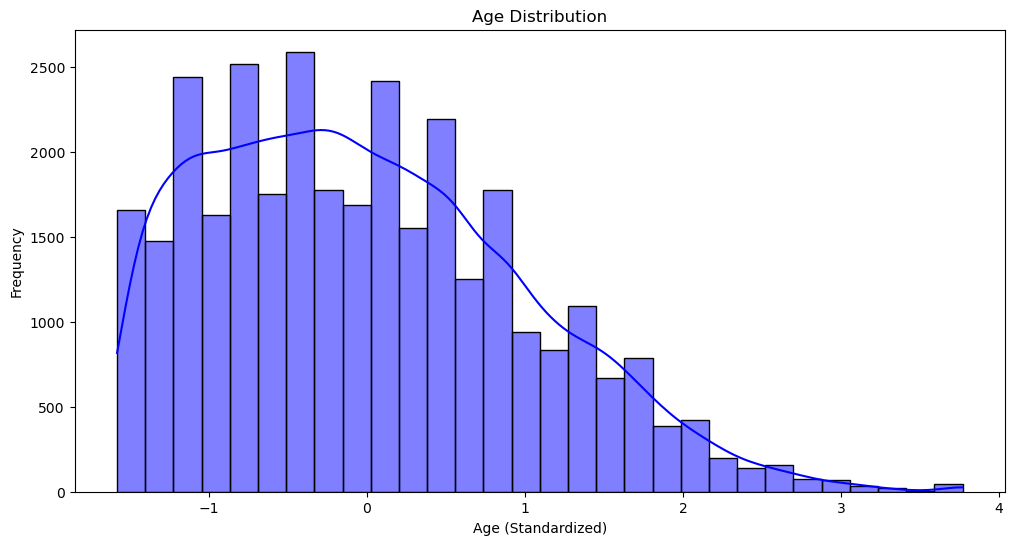

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.histplot(data['AGE'], bins=30, kde=True, color='blue')
plt.title("Age Distribution")
plt.xlabel("Age (Standardized)")
plt.ylabel("Frequency")
plt.show()


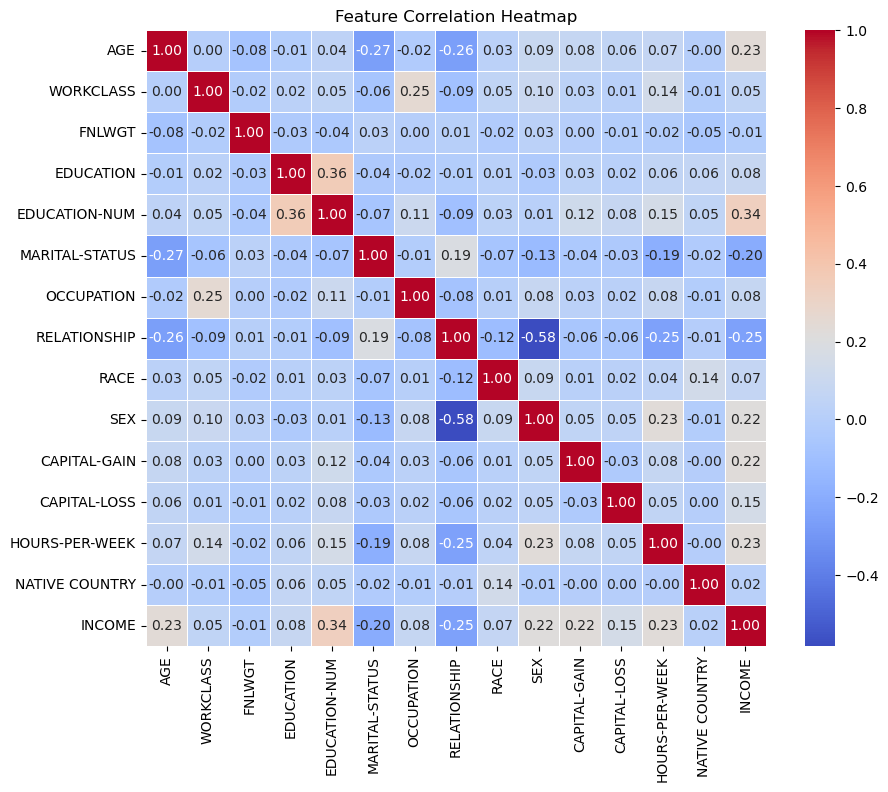

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()


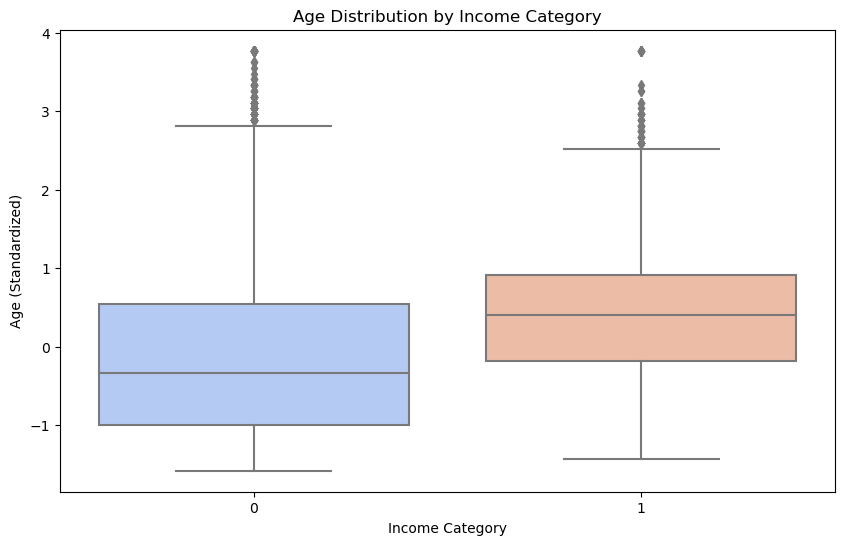

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['INCOME'], y=data['AGE'], palette="coolwarm")
plt.title("Age Distribution by Income Category")
plt.xlabel("Income Category")
plt.ylabel("Age (Standardized)")
plt.show()


C:\Users\kisho\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\kisho\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\kisho\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\kisho\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length

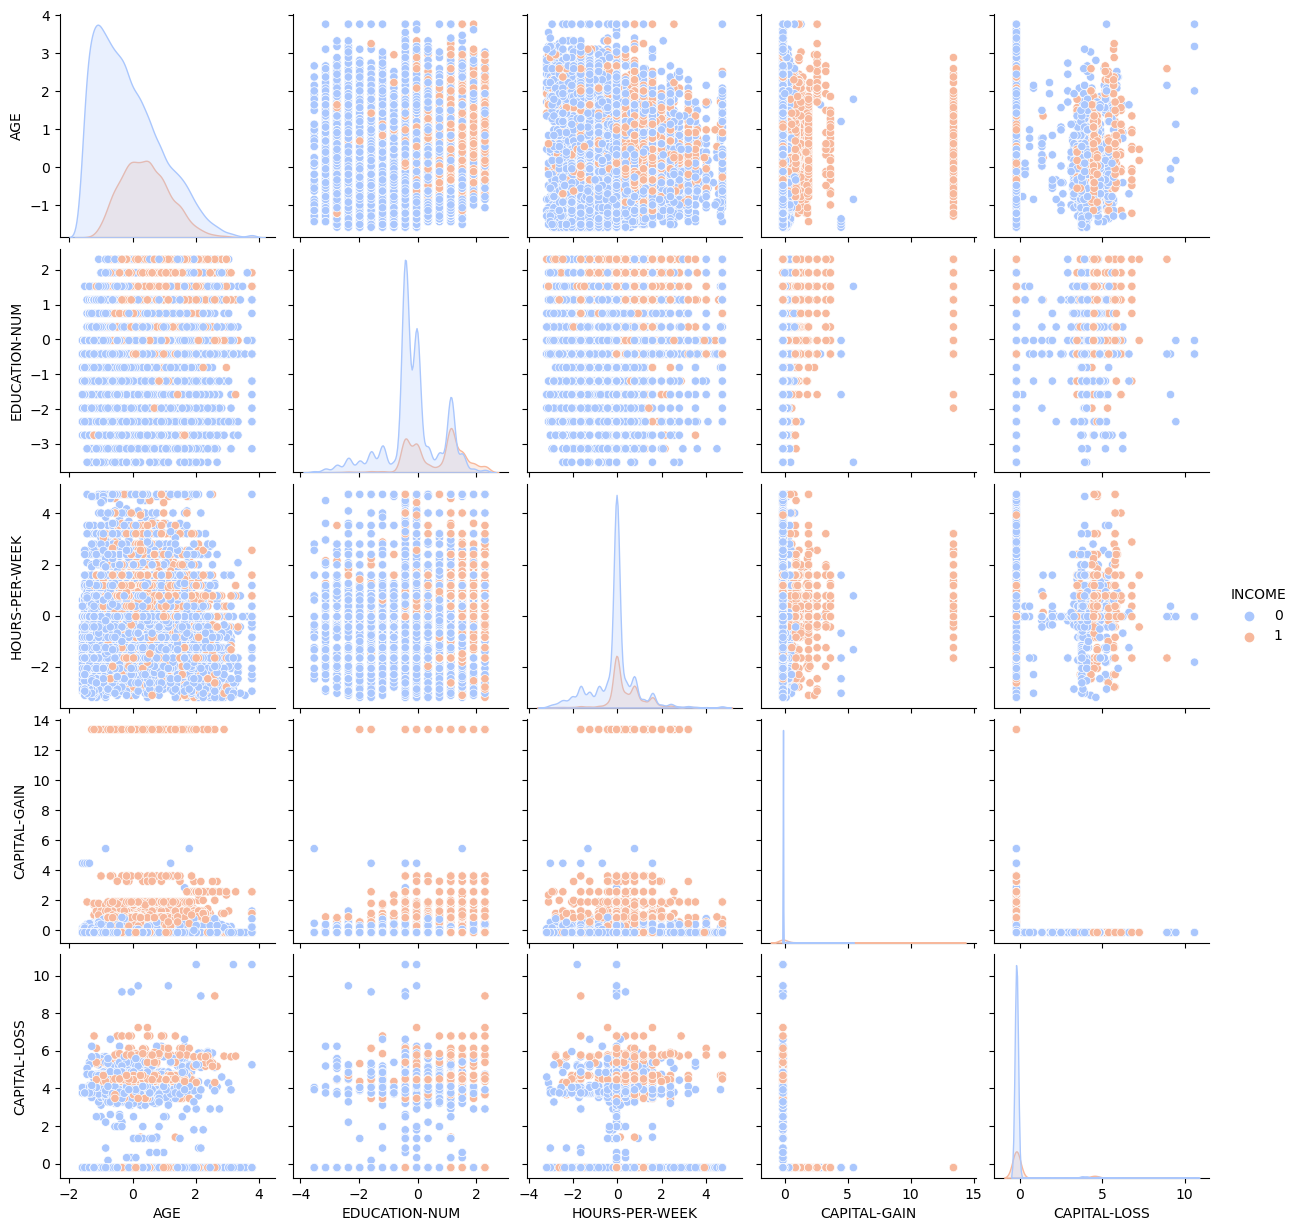

In [ ]:
sns.pairplot(data[['AGE', 'EDUCATION-NUM', 'HOURS-PER-WEEK', 'CAPITAL-GAIN', 'CAPITAL-LOSS', 'INCOME']], hue='INCOME', palette="coolwarm")
plt.show()


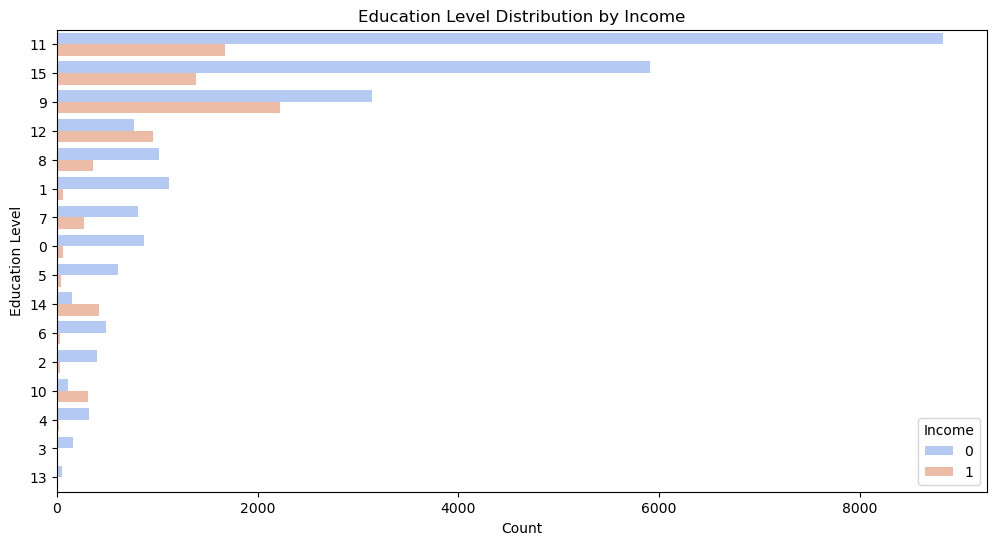

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(y=data['EDUCATION'], hue=data['INCOME'], palette="coolwarm", order=data['EDUCATION'].value_counts().index)
plt.title("Education Level Distribution by Income")
plt.xlabel("Count")
plt.ylabel("Education Level")
plt.legend(title="Income")
plt.show()
